In [5]:
%matplotlib inline

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Visualization and Exploratory Data Analysis Lab
## Visualizing and exploring data. The data mining process

In this lab, you'll get acquainted with the most streamed songs on Spotify in 2024. The dataset and its associated metadata can be found [here](https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024). The version you'll need is provided in the `data/` folder.

You know the drill. Do what you can / want / need to answer the questions to the best of your ability. Answers do not need to be trivial, or even the same among different people.

### Problem 1. Read the dataset (1 point)
Read the file without unzipping it first. You can try a different character encoding, like `unicode_escape`. Don't worry too much about weird characters.

In [8]:
data = pd.read_csv("data/Most_Streamed_Spotify_Songs_2024.csv", encoding=('ISO-8859-1'),low_memory=False)

In [10]:
data

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0


### Problem 2. Perform some cleaning (1 point)
Ensure all data has been read correctly; check the data types. Give the columns better names (e.g. `all_time_rank`, `track_score`, etc.). To do so, try to use `apply()` instead of a manual mapping between old and new name. Get rid of any unnecessary ones.

In [12]:
data.dtypes

def clean_column_names(col):
    return col.strip().lower().replace(' ', '_').replace('.', '').replace('-', '_')

data.columns = data.columns.map(clean_column_names)

missing_data = data.isnull().sum()
print(missing_data[missing_data > 0])

data.head()

artist                           5
spotify_streams                113
spotify_playlist_count          70
spotify_playlist_reach          72
spotify_popularity             804
youtube_views                  308
youtube_likes                  315
tiktok_posts                  1173
tiktok_likes                   980
tiktok_views                   981
youtube_playlist_reach        1009
apple_music_playlist_count     561
airplay_spins                  498
siriusxm_spins                2123
deezer_playlist_count          921
deezer_playlist_reach          928
amazon_playlist_count         1055
pandora_streams               1106
pandora_track_stations        1268
soundcloud_streams            3333
shazam_counts                  577
tidal_popularity              4600
dtype: int64


,track,album_name,artist,release_date,isrc,all_time_rank,track_score,spotify_streams,spotify_playlist_count,spotify_playlist_reach,...,siriusxm_spins,deezer_playlist_count,deezer_playlist_reach,amazon_playlist_count,pandora_streams,pandora_track_stations,soundcloud_streams,shazam_counts,tidal_popularity,explicit_track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


### Problem 3. Most productive artists (1 point)
Who are the five artists with the most songs in the dataset?

Who are the five "clean-mouthed" artists (i.e., with no explicit songs)? **Note:** We're not going into details but we can start a discussion about whether a song needs swearing to be popular.

In [18]:
top_artists = data['artist'].value_counts().head(5)
print(f"Top 5 most productive artists:\n{top_artists}")

Top 5 most productive artists:
artist
Drake           63
Taylor Swift    63
Bad Bunny       60
KAROL G         32
The Weeknd      31
Name: count, dtype: int64


### Problem 4. Most streamed artists (1 point)
And who are the top five most streamed (as measured by Spotify streams) artists?

In [41]:
data['spotify_streams'] = pd.to_numeric(data['spotify_streams'], errors='coerce')

print(data['spotify_streams'].isna().sum())

data = data.dropna(subset=['spotify_streams'])

artist_streams = data.groupby('artist')['spotify_streams'].sum().sort_values(ascending=False).head(5)
print(f"Top 5 most streamed artists:\n{artist_streams}")

0
Top 5 most streamed artists:
Series([], Name: spotify_streams, dtype: float64)


### Problem 5. Songs by year and month (1 point)
How many songs have been released each year? Present an appropriate plot. Can you explain the behavior of the plot for 2024?

How about months? Is / Are there (a) popular month(s) to release music?

[]
[]


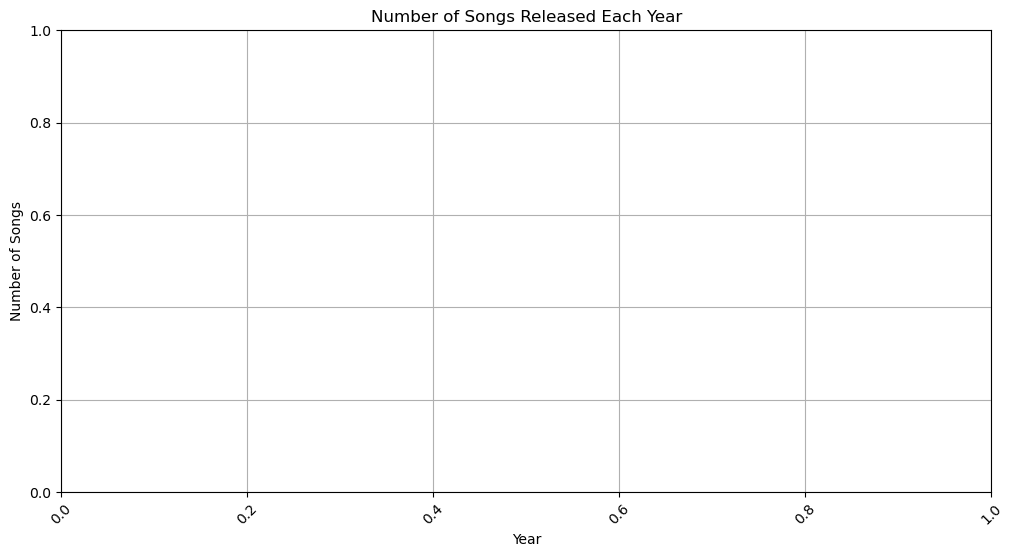

No data available for plotting.


In [61]:
data['release_date'] = pd.to_datetime(data['release_date'], format='%m/%d/%Y', errors='coerce')

data = data.dropna(subset=['release_date'])

data['release_year'] = data['release_date'].dt.year
data['release_month'] = data['release_date'].dt.month

print(data['release_year'].unique())
print(data['release_month'].unique())

songs_by_year = data['release_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=songs_by_year.index, y=songs_by_year.values, marker='o')
plt.title('Number of Songs Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

songs_by_month = data['release_month'].value_counts().sort_index()

if not songs_by_month.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=songs_by_month.index, y=songs_by_month.values, palette='viridis')
    plt.title('Number of Songs Released Each Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Songs')
    plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True)
    plt.show()
else:
    print("No data available for plotting.")

### Problem 6. Playlists (2 points)
Is there any connection (correlation) between users adding a song to playlists in one service, or another? Only Spotify, Apple, Deezer, and Amazon offer the ability to add a song to a playlist. Find a way to plot all these relationships at the same time, and analyze them. Experiment with different types of correlations.

                            spotify_playlist_count  \
spotify_playlist_count                         NaN   
apple_music_playlist_count                     NaN   
deezer_playlist_count                          NaN   
amazon_playlist_count                          NaN   

                            apple_music_playlist_count  deezer_playlist_count  \
spotify_playlist_count                             NaN                    NaN   
apple_music_playlist_count                         NaN                    NaN   
deezer_playlist_count                              NaN                    NaN   
amazon_playlist_count                              NaN                    NaN   

                            amazon_playlist_count  
spotify_playlist_count                        NaN  
apple_music_playlist_count                    NaN  
deezer_playlist_count                         NaN  
amazon_playlist_count                         NaN  


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


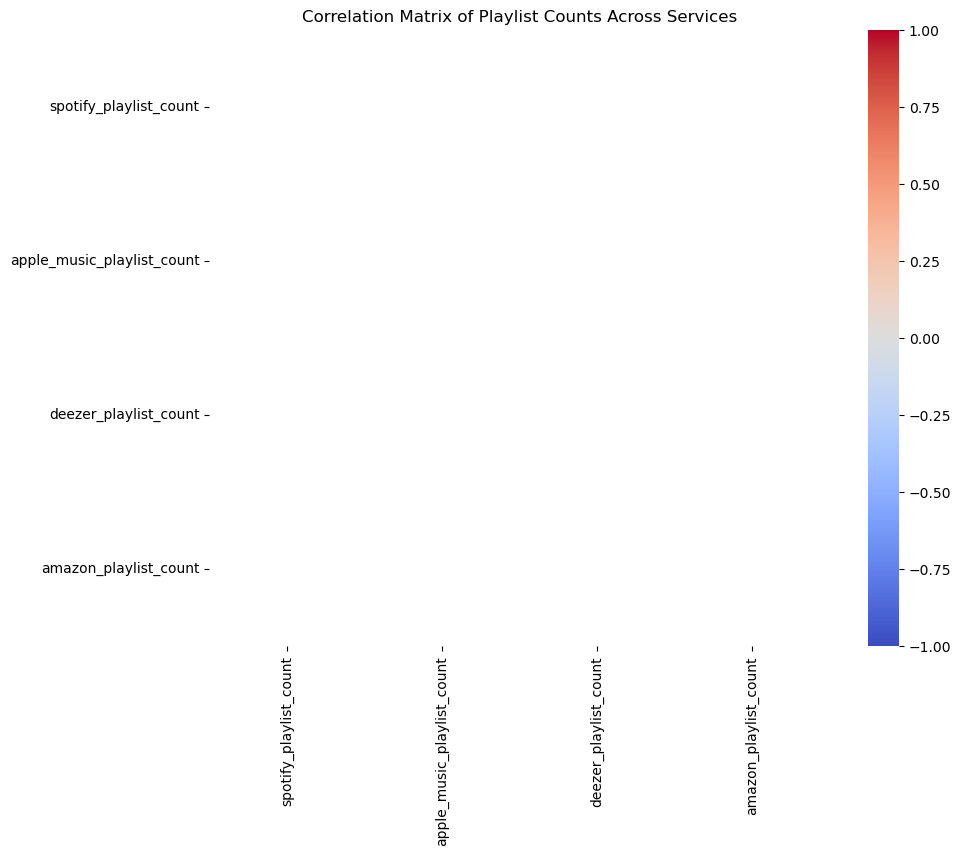

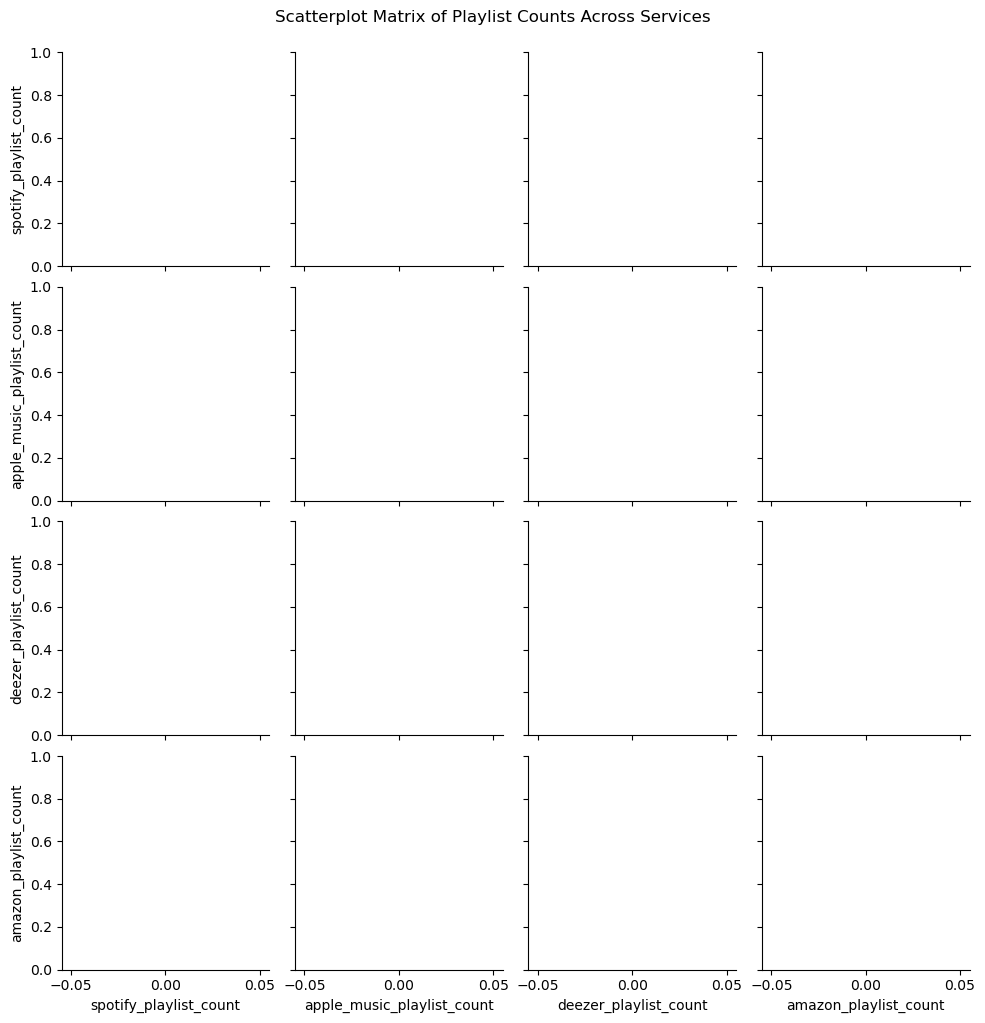

In [76]:
playlist_columns = ['spotify_playlist_count', 'apple_music_playlist_count', 'deezer_playlist_count', 'amazon_playlist_count']
for column in playlist_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

data = data.dropna(subset=playlist_columns)

correlation_matrix = data[playlist_columns].corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Playlist Counts Across Services')
plt.show()

sns.pairplot(data[playlist_columns], kind='scatter', markers='o')
plt.suptitle('Scatterplot Matrix of Playlist Counts Across Services', y=1.02)
plt.show()

### Problem 7. YouTube views and likes (1 point)
What is the relationship between YouTube views and likes? Present an appropriate plot. 

What is the mean YouTube views-to-likes ratio? What is its distribution? Find a way to plot it and describe it.

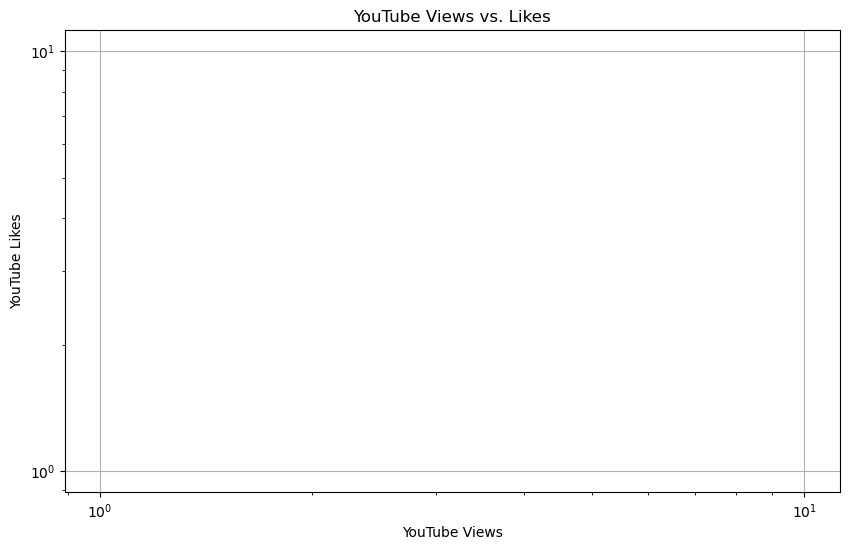

Mean YouTube Views-to-Likes Ratio: nan


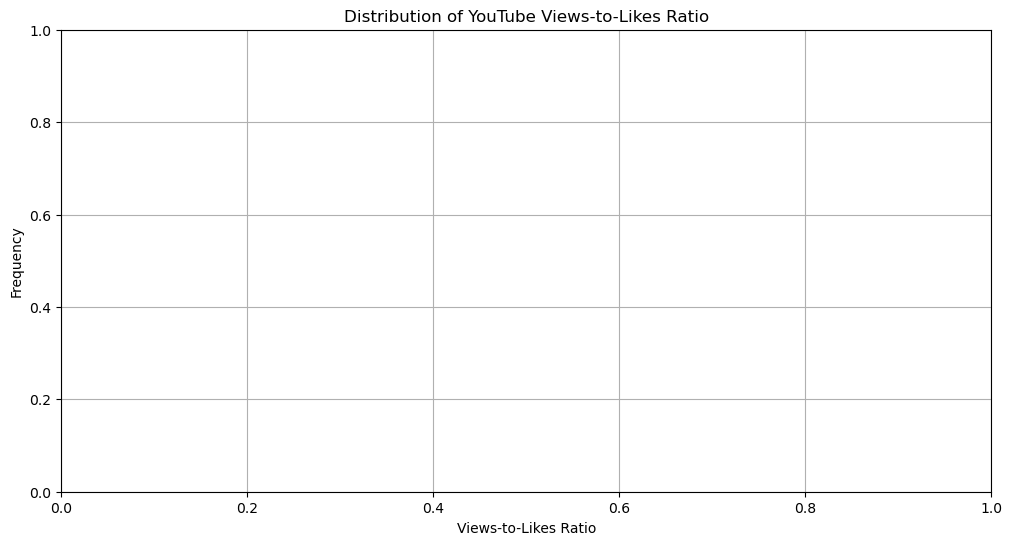

In [81]:
data['youtube_views'] = pd.to_numeric(data['youtube_views'], errors='coerce')
data['youtube_likes'] = pd.to_numeric(data['youtube_likes'], errors='coerce')

data = data.dropna(subset=['youtube_views', 'youtube_likes'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='youtube_views', y='youtube_likes', data=data, alpha=0.6)
plt.title('YouTube Views vs. Likes')
plt.xlabel('YouTube Views')
plt.ylabel('YouTube Likes')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

data['views_to_likes_ratio'] = data['youtube_views'] / data['youtube_likes']

mean_ratio = data['views_to_likes_ratio'].mean()
print(f"Mean YouTube Views-to-Likes Ratio: {mean_ratio:.2f}")

data = data.replace([float('inf'), -float('inf')], pd.NA).dropna(subset=['views_to_likes_ratio'])

plt.figure(figsize=(12, 6))
sns.histplot(data['views_to_likes_ratio'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of YouTube Views-to-Likes Ratio')
plt.xlabel('Views-to-Likes Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Problem 8. TikTok stuff (2 points)
The most popular songs on TikTok released every year show... interesting behavior. Which years peaked the most TikTok views? Show an appropriate chart. Can you explain this behavior? For a bit of context, TikTok was created in 2016.

Now, how much popular is the most popular song for each release year, than the mean popularity? Analyze the results.

In both parts, it would be helpful to see the actual songs.

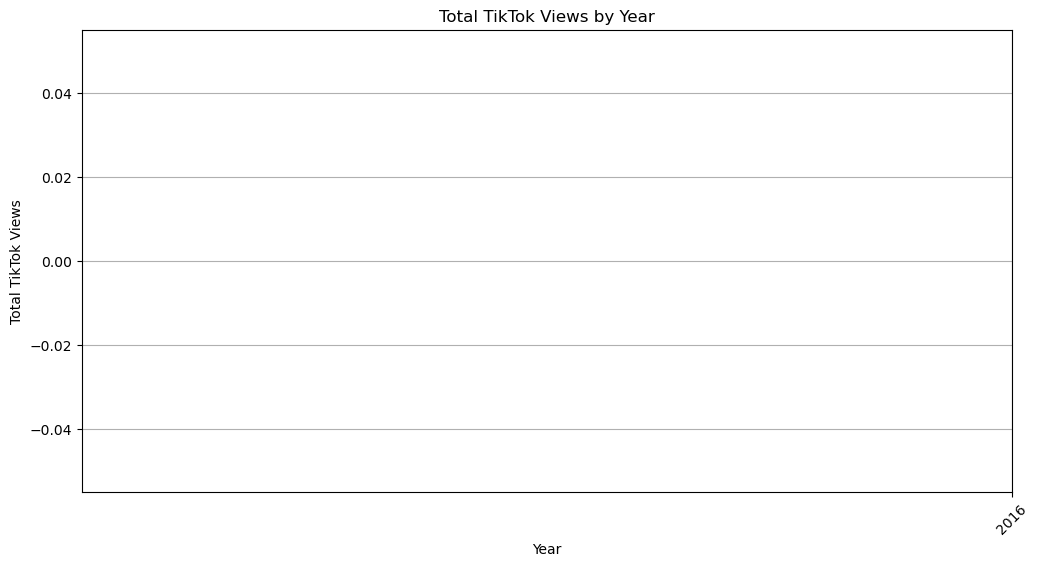

In [114]:
data['release_year'] = pd.to_numeric(data['release_year'], errors='coerce')
data['tiktok_views'] = pd.to_numeric(data['tiktok_views'], errors='coerce')

data = data.dropna(subset=['release_year', 'tiktok_views'])

yearly_views = data.groupby('release_year')['tiktok_views'].sum().reset_index()

yearly_views = yearly_views.sort_values(by='release_year')

if 2016 not in yearly_views['release_year'].values:
    year_2016 = pd.DataFrame({'release_year': [2016], 'tiktok_views': [0]})
    yearly_views = pd.concat([yearly_views, year_2016], ignore_index=True)
    yearly_views = yearly_views.sort_values(by='release_year')

plt.figure(figsize=(12, 6))

colors = ['#FF6347' if year == 2016 else '#4682B4' for year in yearly_views['release_year']]
sns.barplot(x='release_year', y='tiktok_views', data=yearly_views, palette=colors)

plt.title('Total TikTok Views by Year')
plt.xlabel('Year')
plt.ylabel('Total TikTok Views')

plt.xticks(ticks=yearly_views['release_year'], labels=[str(year) for year in yearly_views['release_year']], rotation=45)

plt.grid(True)
plt.show()

### * Problem 9. Explore (and clean) at will
There is a lot to look for here. For example, you can easily link a song to its genres, and lyrics. You may also try to link artists and albums to more info about them. Or you can compare and contrast a song's performance across different platforms, in a similar manner to what you already did above; maybe even assign a better song ranking system (across platforms with different popularity metrics, and different requirements) than the one provided in the dataset.